In [2]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

assert tf.test.is_gpu_available()
assert tf.test.is_built_with_cuda()


2.9.1


2022-07-31 08:23:54.489766: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /device:GPU:0 with 7376 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080, pci bus id: 0000:02:00.0, compute capability: 6.1


In [4]:
EPOCHS = 10
BATCH_SIZE = 32

In [5]:
tf.config.list_physical_devices(device_type=None)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
train_images.shape

4422102/4422102 [==============================] - 1s 0us/step


(60000, 28, 28)

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0
train_images_4d = tf.reshape(train_images, [-1, 28,28,1])
test_images_4d = tf.reshape(test_images, [-1, 28,28,1])

2022-07-31 08:24:09.370265: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7376 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080, pci bus id: 0000:02:00.0, compute capability: 6.1


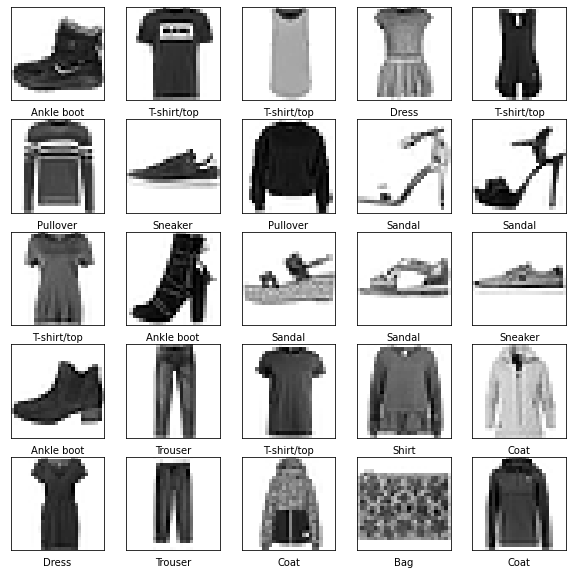

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=2, activation="relu", padding='same', input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=2, activation="relu", padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
model.fit(train_images_4d, train_labels ,epochs=EPOCHS)

Epoch 1/10


2022-07-31 08:24:18.580527: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8401
2022-07-31 08:24:19.953468: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-07-31 08:24:19.954522: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-07-31 08:24:19.954608: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-07-31 08:24:19.955576: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-07-31 08:24:19.955705: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


1875/1875 [==============================] - 8s 2ms/step - loss: 0.5331 - accuracy: 0.8101
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3727 - accuracy: 0.8649
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3339 - accuracy: 0.8779
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3114 - accuracy: 0.8856
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2915 - accuracy: 0.8929
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2780 - accuracy: 0.8958
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2645 - accuracy: 0.9022
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2554 - accuracy: 0.9045
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2453 - accuracy: 0.9075
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2371 - accurac

In [11]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)


313/313 - 1s - loss: 0.2933 - accuracy: 0.8962 - 722ms/epoch - 2ms/step

Test accuracy: 0.8962000012397766


In [18]:
%matplotlib inline 
import matplotlib.pyplot as plt

def plot_dfs(df_list, names):
    # plot train acc
    plt.figure()
    plt.title('Train acc')
    plt.grid()
    for df in df_list:
        plt.plot(df['train_acc'])
    plt.legend(names)
    
    plt.figure()
    plt.title("Test acc")
    plt.grid()
    for df in df_list:
        plt.plot(df['test_acc'])
    plt.legend(names)

In [12]:
def init_conv_model(compile=True):
  conv_model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=1, activation="relu", padding='same', input_shape=(28, 28, 1),),
        tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=2, activation="relu", padding='same'),
        tf.keras.layers.Conv2D(64, 3, strides=2, activation="relu", padding='same'),
      #   tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(64, 3, activation="relu", padding='same'),
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(10, activation="softmax")], name="conv_model")
  if compile:
    conv_model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
  return conv_model


In [13]:
teacher_conv = init_conv_model()
teacher_conv.summary()
teacher_conv.fit(train_images_4d, train_labels, epochs=2)
test_loss_teacher_conv, test_acc_teacher_conv = teacher_conv.evaluate(test_images_4d,  test_labels, verbose=2)


Model: "conv_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 8)         80        
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 16)        1168      
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 7, 64)          9280      
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 global_average_pooling2d (G  (None, 64)               0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten_1 (Flatten)         (None, 64)                0         
                                                        

/home/me.docker/.conda/envs/tf/lib/python3.10/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 6s 3ms/step - loss: 0.7311 - accuracy: 0.7304
Epoch 2/2
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4781 - accuracy: 0.8307
313/313 - 1s - loss: 0.5454 - accuracy: 0.7950 - 769ms/epoch - 2ms/step


In [40]:
from tqdm import tqdm
import pandas as pd
# Prepare the training dataset.

def train_loop(student_model, use_supervised_loss, teacher_model=None, epochs=10, lr=1e-3, 
               distill_weight=1.0, samples=None, verbose=False, logits=True):
    train_samples = samples
    test_samples = samples
    if (samples is not None) and (samples > 0 and samples < 1):
        #samples is a fraction
        train_samples = int(len(train_labels) * samples) 
        test_samples = int(len(test_labels) * samples) 
    print(f'Using {train_samples} for train and {test_samples} for test')
    train_dataset = tf.data.Dataset.from_tensor_slices((train_images_4d[:train_samples], train_labels[:train_samples]))
    train_dataset = train_dataset.shuffle(buffer_size=1024).batch(BATCH_SIZE)
    test_x,  test_y = test_images_4d[:test_samples], test_labels[:test_samples]

    supervised_loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=logits)
    teacher_student_loss = tf.keras.losses.CategoricalCrossentropy()
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
    logs = pd.DataFrame()
    
    @tf.function
    def train_step(x, y, use_supervised_loss, use_distill_loss):
        assert use_supervised_loss or use_distill_loss, "at least one loss should be passed"
        if use_distill_loss:
            pred_teacher = teacher_model(x, training=False)
        with tf.GradientTape() as tape:
            pred = student_model(x, training=True)  # pred for this minibatch
            loss_value = supervised_loss(y, pred) if use_supervised_loss else 0
            if use_distill_loss:
                
                loss_value += distill_weight * teacher_student_loss(pred_teacher, pred) if use_distill_loss else 0
                # loss_value += teacher_student_loss(pred_teacher, pred)
        grads = tape.gradient(loss_value, student_model.trainable_weights)
        train_acc_metric.update_state(y, pred)
        optimizer.apply_gradients(zip(grads, student_model.trainable_weights))
        return loss_value

    use_distill_loss = teacher_model is not None
    print(f"Starting training... supervised {use_supervised_loss}, distill {use_distill_loss}")
    for epoch in tqdm(range(epochs)):
        train_acc_metric.reset_state()
        for i, (x_batch, y_batch) in enumerate(train_dataset):
            loss_value = 0
            with tf.device("/gpu:0"):
                loss_value += train_step(x_batch, y_batch,  
                                         use_supervised_loss=use_supervised_loss, 
                                         use_distill_loss=use_distill_loss)
        test_loss_student_model, test_acc_student_model = student_model.evaluate(test_x,  test_y, verbose=0)
        stat_dict = {"train_loss":float(loss_value / (len(x_batch) / 32)),
                    "train_acc": train_acc_metric.result().numpy(),
                    "test_loss": test_loss_student_model,
                    "test_acc": test_acc_student_model}
        if verbose:
            print(f"Epoch {epoch}: { {k: np.round(v,4) for k,v in stat_dict.items()}}")
        logs = pd.concat([logs, pd.DataFrame(stat_dict, index=[epoch])])
    return logs

In [16]:
supervised_student = init_conv_model()
supervised_logs = train_loop(student_model=supervised_student, use_supervised_loss=True)
display(supervised_logs)


Starting training... supervised True, distill False


100%|██████████| 10/10 [00:56<00:00,  5.69s/it]


,train_loss,train_acc,test_loss,test_acc
0,0.357811,0.718217,0.570678,0.7952
1,0.476778,0.820433,0.479081,0.8339
2,0.608084,0.847433,0.469271,0.8336
3,0.350257,0.865983,0.402433,0.8562
4,0.250965,0.876317,0.334000,0.8804
5,0.085767,0.887017,0.352897,0.8749
6,0.223508,0.892617,0.344299,0.8791
7,0.168991,0.898633,0.309513,0.8933
8,0.157670,0.903233,0.306217,0.8919
9,0.442639,0.908017,0.309864,0.8911


In [44]:
logs = dict()
models = dict()

313/313 - 1s - loss: 0.3099 - accuracy: 0.8911 - 594ms/epoch - 2ms/step
Using 30000 for train and 5000 for test
Starting training... supervised True, distill True


  0%|          | 0/10 [00:00<?, ?it/s]/home/me.docker/.conda/envs/tf/lib/python3.10/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
100%|██████████| 10/10 [00:33<00:00,  3.33s/it]


lr - 0.001 , weight - 0.5 max test acc (9, 0.881)
Using 30000 for train and 5000 for test
Starting training... supervised True, distill True


  0%|          | 0/10 [00:00<?, ?it/s]/home/me.docker/.conda/envs/tf/lib/python3.10/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
100%|██████████| 10/10 [00:33<00:00,  3.34s/it]


lr - 0.001 , weight - 1.0 max test acc (5, 0.8758)
Using 30000 for train and 5000 for test
Starting training... supervised True, distill True


  0%|          | 0/10 [00:00<?, ?it/s]/home/me.docker/.conda/envs/tf/lib/python3.10/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
100%|██████████| 10/10 [00:33<00:00,  3.38s/it]


lr - 0.001 , weight - 2   max test acc (9, 0.864)
Using 30000 for train and 5000 for test
Starting training... supervised True, distill True


  0%|          | 0/10 [00:00<?, ?it/s]/home/me.docker/.conda/envs/tf/lib/python3.10/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
100%|██████████| 10/10 [00:33<00:00,  3.38s/it]


lr - 0.005 , weight - 0.5 max test acc (7, 0.8992)
Using 30000 for train and 5000 for test
Starting training... supervised True, distill True


  0%|          | 0/10 [00:00<?, ?it/s]/home/me.docker/.conda/envs/tf/lib/python3.10/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
100%|██████████| 10/10 [00:33<00:00,  3.38s/it]


lr - 0.005 , weight - 1.0 max test acc (9, 0.8928)
Using 30000 for train and 5000 for test
Starting training... supervised True, distill True


  0%|          | 0/10 [00:00<?, ?it/s]/home/me.docker/.conda/envs/tf/lib/python3.10/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
100%|██████████| 10/10 [00:33<00:00,  3.40s/it]


lr - 0.005 , weight - 2   max test acc (6, 0.893)
Using 30000 for train and 5000 for test
Starting training... supervised True, distill True


  0%|          | 0/10 [00:00<?, ?it/s]/home/me.docker/.conda/envs/tf/lib/python3.10/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
100%|██████████| 10/10 [00:33<00:00,  3.36s/it]


lr - 0.01  , weight - 0.5 max test acc (9, 0.8622)
Using 30000 for train and 5000 for test
Starting training... supervised True, distill True


  0%|          | 0/10 [00:00<?, ?it/s]/home/me.docker/.conda/envs/tf/lib/python3.10/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
100%|██████████| 10/10 [00:33<00:00,  3.33s/it]


lr - 0.01  , weight - 1.0 max test acc (8, 0.8856)
Using 30000 for train and 5000 for test
Starting training... supervised True, distill True


  0%|          | 0/10 [00:00<?, ?it/s]/home/me.docker/.conda/envs/tf/lib/python3.10/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
100%|██████████| 10/10 [00:33<00:00,  3.36s/it]


lr - 0.01  , weight - 2   max test acc (8, 0.8888)


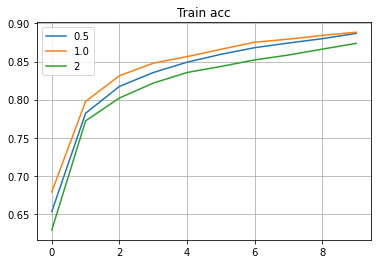

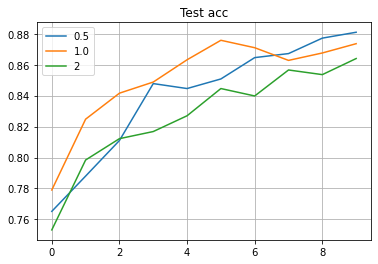

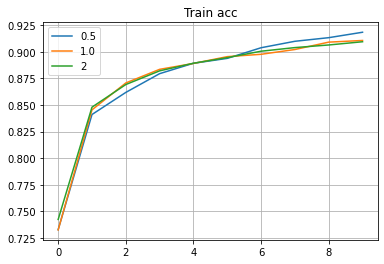

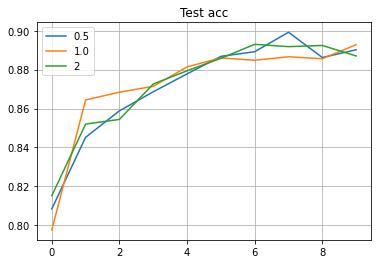

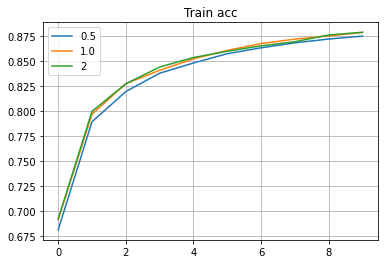

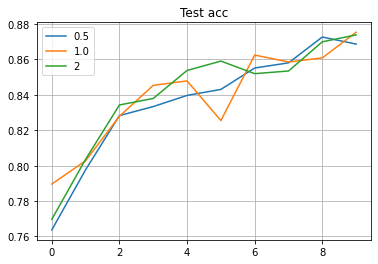

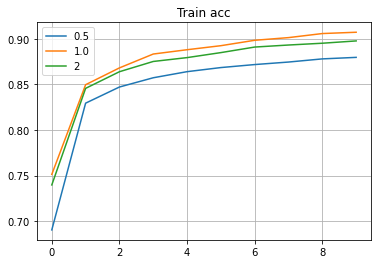

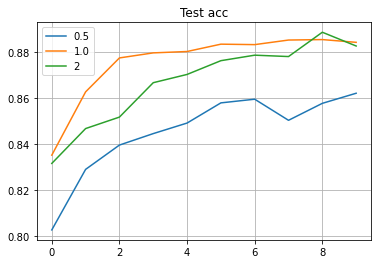

In [55]:
supervised_student.evaluate(test_images_4d, test_labels, verbose=2)
for lr in [1e-3, 5e-3, 1e-2]:
    logs[lr] = dict()
    models[lr] = dict()
    for distill_weight in [0.5, 1.0 ,2]:
        distill_student = init_conv_model()
        logs[lr][distill_weight] = train_loop(student_model=distill_student, use_supervised_loss=True, 
                                              teacher_model=supervised_student, 
                                              lr=lr, distill_weight=distill_weight, samples=0.5)
        models[lr][distill_weight] = distill_student
        print(f'lr - {lr:<6}, weight - {distill_weight:<3}' \
              + f' max test acc {logs[lr][distill_weight].test_acc.argmax(), np.round(logs[lr][distill_weight].test_acc.max(),4)}')
    
for lr in logs:
    plot_dfs(logs[lr].values(), names=logs[lr].keys())

In [56]:
for lr in logs:
    for weight in logs[lr]:
        print(f'lr - {lr:<6}, weight - {weight:<3}' \
              + f' max test acc {logs[lr][weight].test_acc.argmax(), np.round(logs[lr][weight].test_acc.max(),4)}')
    


lr - 0.001 , weight - 0.5 max test acc (9, 0.881)
lr - 0.001 , weight - 1.0 max test acc (5, 0.8758)
lr - 0.001 , weight - 2   max test acc (9, 0.864)
lr - 0.005 , weight - 0.5 max test acc (7, 0.8992)
lr - 0.005 , weight - 1.0 max test acc (9, 0.8928)
lr - 0.005 , weight - 2   max test acc (6, 0.893)
lr - 0.0005, weight - 0.5 max test acc (8, 0.8727)
lr - 0.0005, weight - 1.0 max test acc (9, 0.8754)
lr - 0.0005, weight - 2   max test acc (9, 0.8739)
lr - 0.01  , weight - 0.5 max test acc (9, 0.8622)
lr - 0.01  , weight - 1.0 max test acc (8, 0.8856)
lr - 0.01  , weight - 2   max test acc (8, 0.8888)


In [201]:

print('Teacher baseline')
test_loss_teacher_conv, test_acc_teacher_conv = teacher_conv.evaluate(test_images_4d,  test_labels, verbose=2)

distill_student = init_conv_model()
distill_logs = train_loop(student_model=distill_student, use_supervised_loss=False, teacher_model=teacher_conv)
display(distill_logs)

both_student = init_conv_model()
both_logs = train_loop(student_model=both_student, use_supervised_loss=True, teacher_model=teacher_conv)
display(both_logs)



Teacher baseline
313/313 - 1s - loss: 0.3459 - accuracy: 0.8738 - 1s/epoch - 4ms/step
Starting training... supervised False, distill True


1875it [00:17, 104.99it/s]
/Users/andreyg/miniforge3/envs/tf_m1/lib/python3.10/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
1875it [00:16, 110.55it/s]
1875it [00:17, 109.37it/s]
1875it [00:17, 109.53it/s]
1875it [00:17, 108.69it/s]
1875it [00:16, 110.61it/s]
1875it [00:17, 107.96it/s]
1875it [00:17, 109.20it/s]
1875it [00:17, 107.95it/s]
1875it [00:17, 106.51it/s]


,train_loss,train_acc,test_loss,test_acc
0,0.387841,0.722067,0.606161,0.7714
1,0.254170,0.827017,0.457218,0.8353
2,0.451764,0.850800,0.411831,0.8508
3,0.454999,0.861283,0.395575,0.8537
4,0.394632,0.868533,0.381179,0.8589
5,0.317362,0.872183,0.372057,0.8638
6,0.492373,0.875467,0.374652,0.8606
7,0.341602,0.878050,0.351897,0.8693
8,0.363374,0.880183,0.363682,0.8680
9,0.333802,0.881383,0.360177,0.8671


Starting training... supervised True, distill True


0it [00:00, ?it/s]/Users/andreyg/miniforge3/envs/tf_m1/lib/python3.10/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
1875it [00:17, 105.12it/s]
1875it [00:17, 108.85it/s]
1875it [00:17, 108.49it/s]
1875it [00:17, 107.94it/s]
1875it [00:17, 108.85it/s]
1875it [00:17, 109.27it/s]
1875it [00:17, 109.95it/s]
1875it [00:17, 108.11it/s]
1875it [00:17, 108.19it/s]
1875it [00:17, 109.27it/s]


,train_loss,train_acc,test_loss,test_acc
0,0.810374,0.731350,0.544539,0.8122
1,0.789799,0.836167,0.422316,0.8496
2,0.768086,0.858367,0.376873,0.8667
3,0.771850,0.870900,0.356841,0.8724
4,0.692148,0.880933,0.345307,0.8758
5,0.569954,0.886033,0.332663,0.8798
6,0.746413,0.892383,0.314350,0.8890
7,0.852665,0.895117,0.307451,0.8867
8,0.560149,0.899933,0.306300,0.8908
9,0.787318,0.903417,0.288708,0.8943


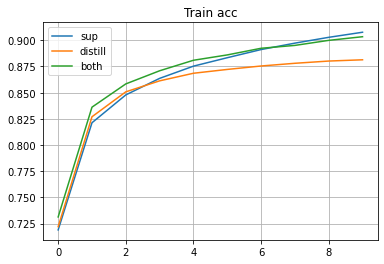

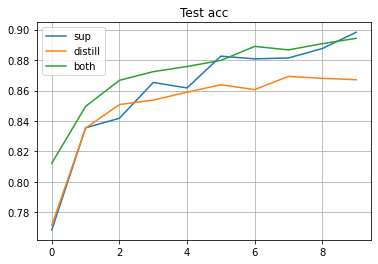

In [208]:
%matplotlib inline 
import matplotlib.pyplot as plt

def plot_dfs(df_list, names):
    # plot train acc
    plt.figure()
    plt.title('Train acc')
    plt.grid()
    for df in df_list:
        plt.plot(df['train_acc'])
    plt.legend(names)
    
    plt.figure()
    plt.title("Test acc")
    plt.grid()
    for df in df_list:
        plt.plot(df['test_acc'])
    plt.legend(names)



In [9]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [10]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

for i, class_name in enumerate(class_names):
    print(i, class_name)

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot


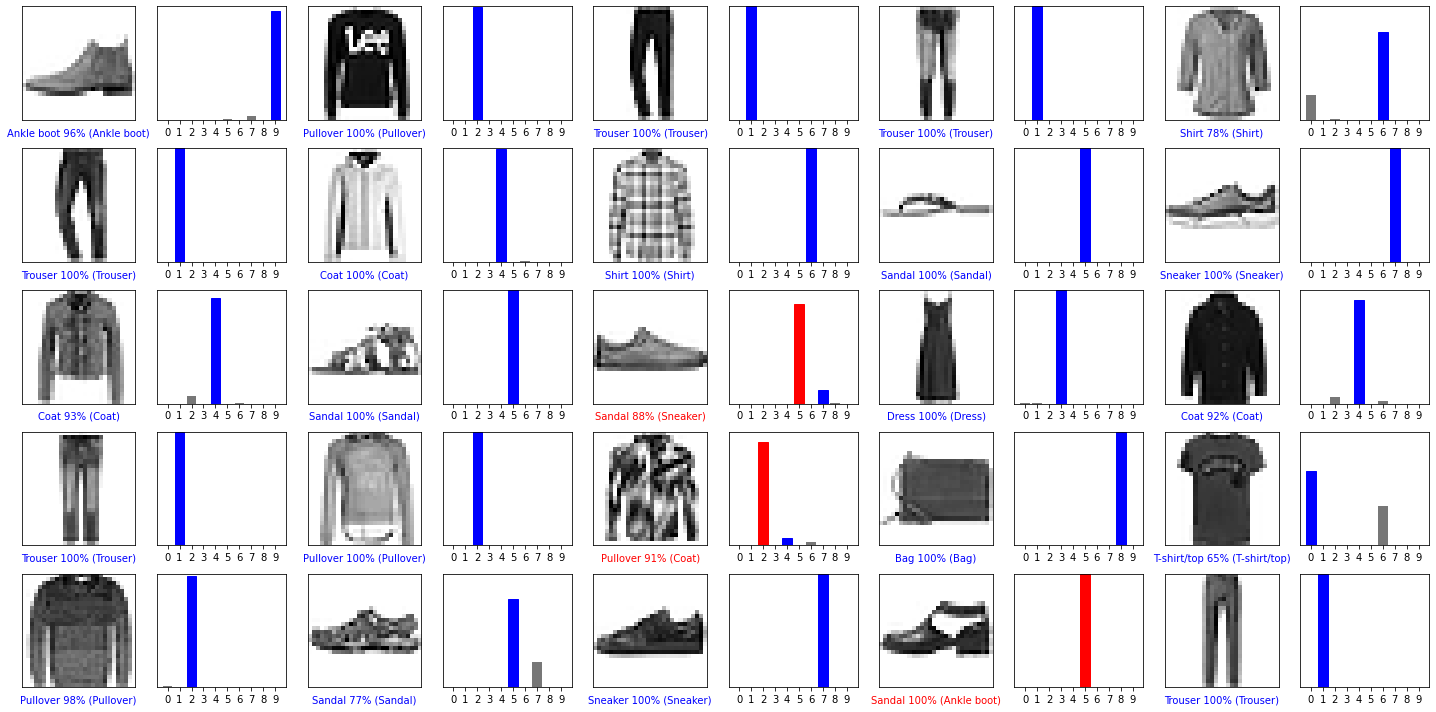

In [11]:
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()